<a href="https://colab.research.google.com/github/Srujan-rai/Deepfake-Audio-Detection-final/blob/main/model_with_roc_and_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from sklearn.model_selection import train_test_split

data_dir = '/content/drive/MyDrive/Deepfake/Deepfake - Voice Detection/KAGGLE/DATA'  # Path to the 'data' directory
image_paths = []
labels = []

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    for image_filename in os.listdir(label_dir):
        image_paths.append(os.path.join(label_dir, image_filename))
        labels.append(label)

X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


image_height=640
image_width=480

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


train_datagen = datagen.flow_from_directory(data_dir,
                                            target_size=(image_height, image_width),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='training')
val_datagen = datagen.flow_from_directory(data_dir,
                                          target_size=(image_height, image_width),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='validation')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model.fit(train_datagen,
                    validation_data=val_datagen,

                    epochs=45,

                    verbose=1,
                    callbacks=[early_stopping])


Found 262 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Epoch 1/20
9/9 [==============================] - 149s 15s/step - loss: 12.6738 - accuracy: 0.5076 - val_loss: 1.7891 - val_accuracy: 0.4615
Epoch 2/20
9/9 [==============================] - 37s 4s/step - loss: 0.8827 - accuracy: 0.5305 - val_loss: 0.6820 - val_accuracy: 0.5077
Epoch 3/20
9/9 [==============================] - 30s 3s/step - loss: 0.6939 - accuracy: 0.4618 - val_loss: 0.6808 - val_accuracy: 0.4615
Epoch 4/20
9/9 [==============================] - 31s 3s/step - loss: 0.6946 - accuracy: 0.4618 - val_loss: 0.6697 - val_accuracy: 0.4615
Epoch 5/20
9/9 [==============================] - 30s 3s/step - loss: 0.6931 - accuracy: 0.4618 - val_loss: 0.6714 - val_accuracy: 0.4615
Epoch 6/20
9/9 [==============================] - 35s 4s/step - loss: 0.6928 - accuracy: 0.4618 - val_loss: 0.6831 - val_accuracy: 0.4615
Epoch 7/20
9/9 [==============================] - 35s 4s/step - loss: 0.6914 - accuracy:

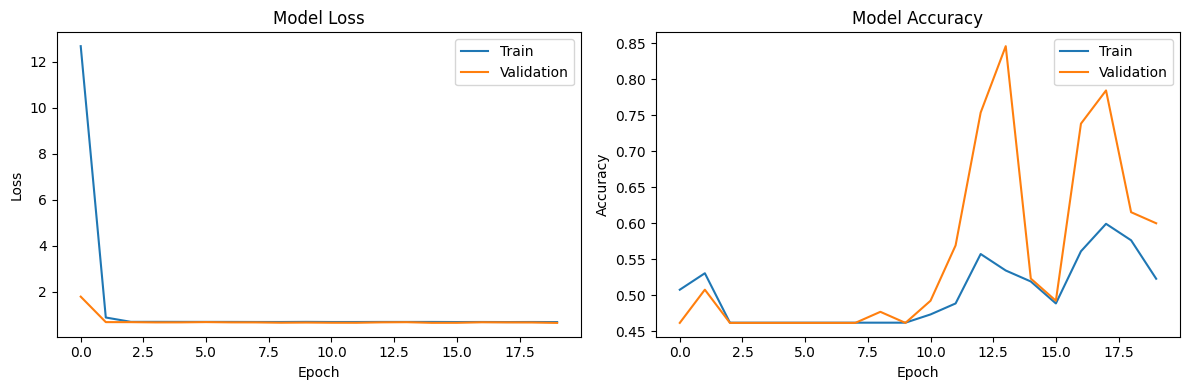

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


3/3 [==============================] - 5s 1s/step


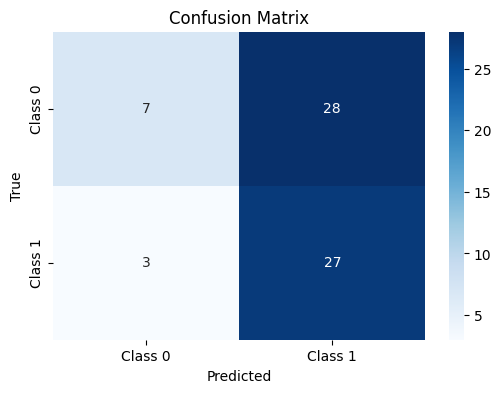

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

true_labels = val_datagen.classes

predictions = model.predict(val_datagen)

predicted_labels = np.argmax(predictions, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

3/3 [==============================] - 21s 3s/step


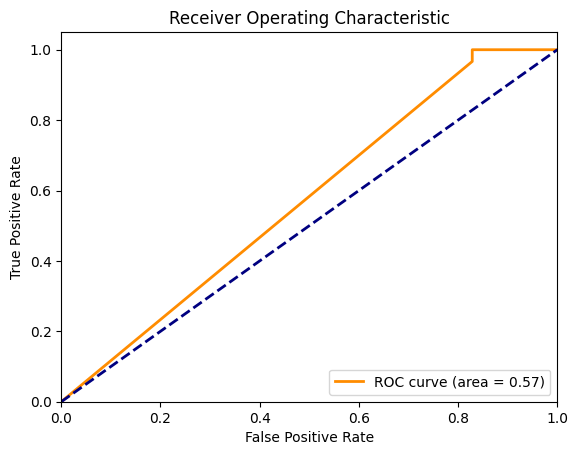

In [ ]:
from sklearn.metrics import roc_curve, auc


true_labels = val_datagen.classes
predicted_probs = model.predict(val_datagen)


fpr, tpr, _ = roc_curve(true_labels, predicted_probs[:, 1])


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Deepfake/Deepfake - Voice Detection/KAGGLE/MODEL/deepfake_model3.h5')
